<a href="https://colab.research.google.com/github/soupriyaaa/ml-lab-assignments/blob/main/08-LR_iris/exp_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
digits = load_digits()
X = digits.data
y = digits.target

print("Dataset shape:", X.shape)
print("Number of classes:", len(np.unique(y)))

Dataset shape: (1797, 64)
Number of classes: 10


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
results = []

In [ ]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)
results.append(["Linear", 1, "N/A", acc_linear * 100])

print("\n🔹 Linear Kernel Accuracy:", acc_linear * 100, "%")
print("\nConfusion Matrix (Linear):\n", confusion_matrix(y_test, y_pred_linear))
print("\nClassification Report (Linear):\n", classification_report(y_test, y_pred_linear))


🔹 Linear Kernel Accuracy: 97.5 %

Confusion Matrix (Linear):
 [[36  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  1]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  1]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  1  0 36  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  3  0  0  0  0  0  1 31  0]
 [ 0  0  0  0  0  0  0  1  0 35]]

Classification Report (Linear):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.94      0.93        36
           2       1.00      1.00      1.00        35
           3       0.97      0.97      0.97        37
           4       1.00      1.00      1.00        36
           5       1.00      0.97      0.99        37
           6       1.00      1.00      1.00        36
           7       0.95      1.00      0.97        36
           8       0.97      0.89      0.93        35
           9       0.95      0.

In [ ]:
params = [
    (1, "scale"),
    (1, 0.1),
    (1, 0.01),
    (10, 0.1),
    (100, 0.1)
]

for C, gamma in params:
    svm_rbf = SVC(kernel='rbf', C=C, gamma=gamma)
    svm_rbf.fit(X_train, y_train)
    y_pred_rbf = svm_rbf.predict(X_test)
    acc_rbf = accuracy_score(y_test, y_pred_rbf)
    results.append(["RBF", C, gamma, acc_rbf * 100])
    print(f"\n🔹 RBF Kernel (C={C}, gamma={gamma}) Accuracy: {acc_rbf * 100:.2f}%")



🔹 RBF Kernel (C=1, gamma=scale) Accuracy: 97.50%

🔹 RBF Kernel (C=1, gamma=0.1) Accuracy: 91.94%

🔹 RBF Kernel (C=1, gamma=0.01) Accuracy: 97.78%

🔹 RBF Kernel (C=10, gamma=0.1) Accuracy: 91.94%

🔹 RBF Kernel (C=100, gamma=0.1) Accuracy: 91.94%


In [ ]:
results_df = pd.DataFrame(results, columns=["Kernel", "C", "Gamma", "Accuracy (%)"])
print("\n Observation Table ")
print(results_df)



 Observation Table 
   Kernel    C  Gamma  Accuracy (%)
0  Linear    1    N/A     97.500000
1     RBF    1  scale     97.500000
2     RBF    1    0.1     91.944444
3     RBF    1   0.01     97.777778
4     RBF   10    0.1     91.944444
5     RBF  100    0.1     91.944444


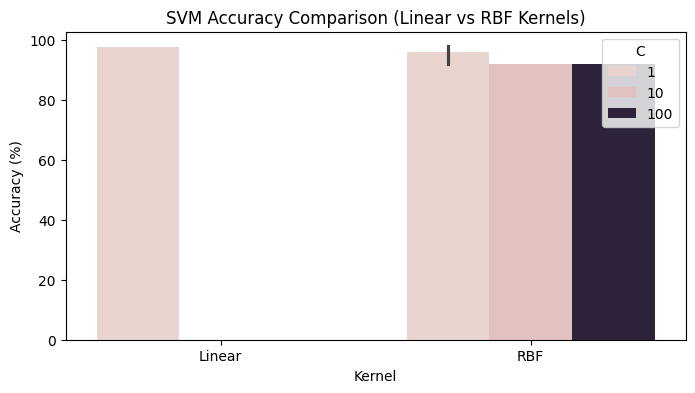

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x="Kernel", y="Accuracy (%)", hue="C", data=results_df)
plt.title("SVM Accuracy Comparison (Linear vs RBF Kernels)")
plt.show()

In [ ]:
best_model = results_df.iloc[results_df['Accuracy (%)'].idxmax()]
print("\n Best Model Configuration:")
print(best_model)


 Best Model Configuration:
Kernel                RBF
C                       1
Gamma                0.01
Accuracy (%)    97.777778
Name: 3, dtype: object
